<a href="https://colab.research.google.com/github/Kimhanjae7/ML_DL/blob/main/KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors (KNN)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Dataset

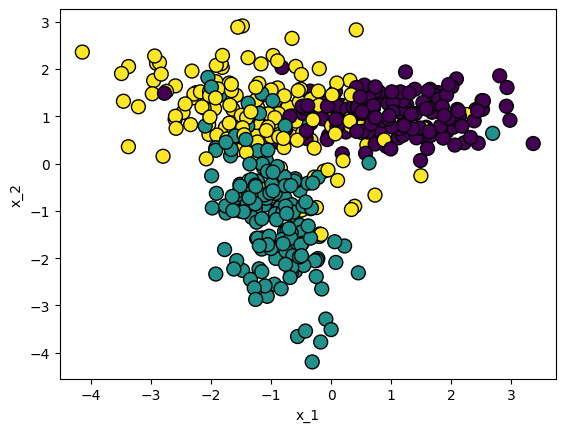

In [ ]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_classes=3,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=40)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

In [ ]:
# Training/Testing Dataset 분리 (80:20)
# X_train: 학습용 입력 데이터(features)
# X_test: 테스트용 입력 데이터(features)
# y_train: 학습용 출력 데이터(labels)
# y_test: 테스트용 출력 데이터(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("Training samples: ", len(X_train))
print("Testing samples: ", len(X_test))

Training samples:  400
Testing samples:  100


## Model


In [ ]:
def L2_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
  def __init__(self, k=3):
    # initialization 이웃 개수(k) : 3
    self.k = k

  def fit(self, X, y):
    # Storage training datas
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    # Prediction
    y_pred = []
    # 입력 데이터에 대한 반복
    for input in X:
      distances = []
      # train 데이터에 대한 반복
      for x_train in self.X_train:
        # 거리 계산
        distances.append(L2_distance(input, x_train))

      # data : 1, 4, 2, 6, 7
      # index : 0, 1, 2, 3, 4

      # -> sort : 1, 2, 4, 6, 7  -- sorting 결과 : Data
      # -> argsort : 0, 2, 1, 3, 4  -- sorting 결과 : index

      y_sorted = self.y_train[np.argsort(distances)][:self.k] # [:k] : 배열에서 상위 k개만큼 슬라이싱
      y_pred.append(np.argmax(np.bincount(y_sorted))) # argmax : 가장 높은 값의 인덱스
                                                     # bincount : 양의 정수 array 값들의 빈도 수 생성

      # 수업 답안
      # index = np.argsort(distances)[:self.k]
      # label = [] 레이블에는 색상정보 즉, 가까이 있는 k개 data의 색상정보

      # for i in index:
        # label.append(self.y_train[i])

      # prediction = max(label, key=label.count) label에서 가장 많은 색상의 data를 저장
      # y_pred.append(prediction)

    # return y_pred

    return np.array(y_pred)

## Prediction

In [ ]:
model = KNN()
model.fit(X_train, y_train) # 학습
y_pred = model.predict(X_test) # 테스트과정

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.81


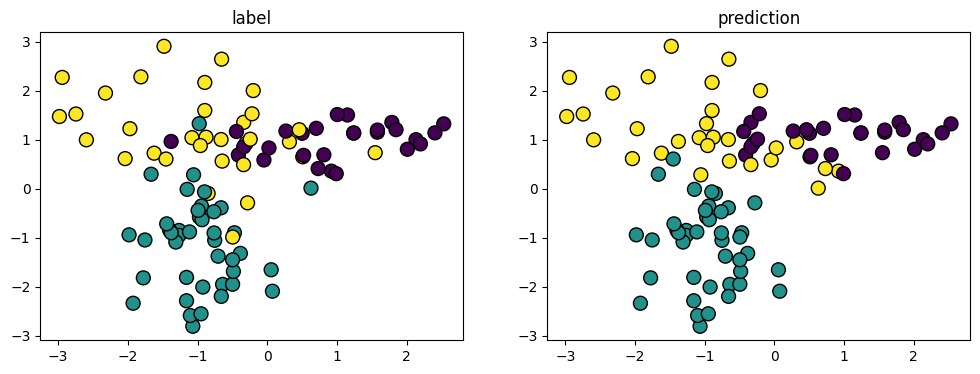

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title("label")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=100, edgecolor="k", linewidth=1)

plt.subplot(1, 2, 2)
plt.title("prediction")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred, s=100, edgecolor="k", linewidth=1)
plt.show()

### 기말고사 연습문제

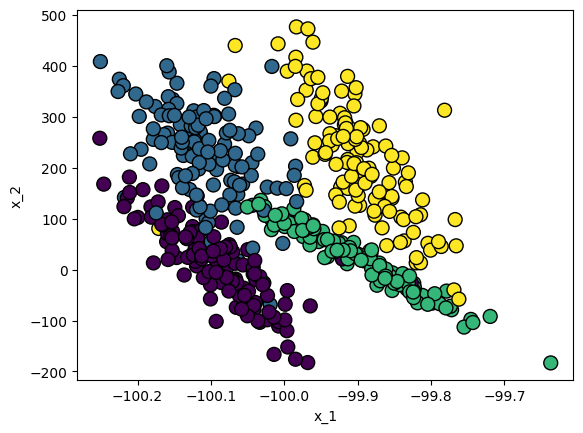

In [ ]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_classes=4,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=40)

X[:, 0] = X[:, 0] * 0.1 - 100
X[:, 1] = X[:, 1] * 100 + 120

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

In [ ]:
# Training/Testing Dataset 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("Training samples: ", len(X_train))
print("Testing samples: ", len(X_test))

Training samples:  400
Testing samples:  100


In [ ]:
model = KNN(k=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.43
